<a href="https://colab.research.google.com/github/AnaghaKRadhakrishnan/PRODIGY_ML_01/blob/PRODIGY_ML_01_CODE/PRODIGY_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the necessery libraries

In [1]:
!pip install pandas scikit-learn matplotlib
import pandas as pd
import numpy as np

Uploading the dataset from kaggle

In [5]:
from google.colab import files
uploaded = files.upload()
# Note:  The provided path "C:\Users\Anagha\Downloads\house-prices-advanced-regression-techniques.zip" is not usable in this context.
# The files.upload() function in Google Colab allows the user to upload files directly through the interface.  No local path is needed.

Saving train.csv to train (1).csv


Loading the dataset for performing algorithm

In [11]:
# Load the dataset into a pandas DataFrame
file_name = '/content/train (1).csv'  # Replace with your dataset filename
df = pd.read_csv(file_name)

# Display the first few rows of the dataset
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Selecting or scaling the features we want

In [15]:
df = df[['SalePrice','FullBath', 'HalfBath','TotRmsAbvGrd','1stFlrSF','2ndFlrSF','LowQualFinSF']]

df.isnull().sum()

df = df.dropna()

df.head()


,SalePrice,FullBath,HalfBath,TotRmsAbvGrd,1stFlrSF,2ndFlrSF,LowQualFinSF
0,208500,2,1,8,856,854,0
1,181500,2,0,6,1262,0,0
2,223500,2,1,6,920,866,0
3,140000,1,0,7,961,756,0
4,250000,2,1,9,1145,1053,0


Define Features (X) and Target (y)

In [17]:
X = df.drop(['FullBath', 'HalfBath','TotRmsAbvGrd','1stFlrSF','2ndFlrSF','LowQualFinSF'], axis=1)
y = df['SalePrice']

Splitting the data into test and train datas

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1168, 1), (292, 1), (1168,), (292,))

Initialising and training the linear regression model

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [1.]
Intercept: 1.7462298274040222e-10


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 6.042533292600962e-11
Mean Squared Error: 6.4432157346897646e-21
R-squared: 1.0


Plotting the results

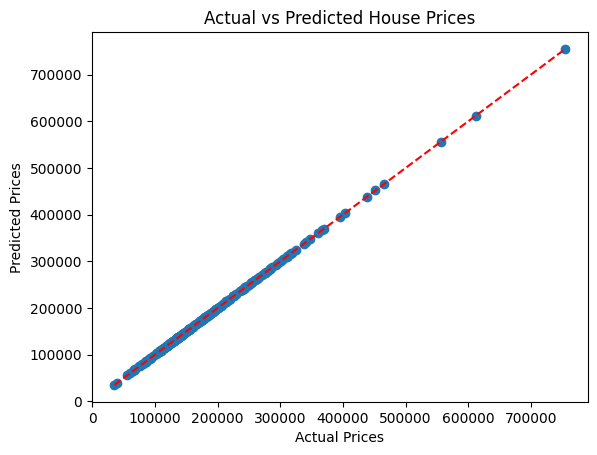

In [21]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Prices
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()
